In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
    Loads data from a csv file
"""
def load_data(filename):
    df = pd.read_csv(filename, header=None)
    return df

In [2]:
"""
    Preprocess the training data
"""
def preprocess_train_data(df):
    # Extract the predicted values from the dataset and replace '3' by '1' and '5' by '-1'
    actual=(np.where(df.iloc[:,0]==3,1,-1))
    
    # Extract the training data inputs from the dataset, append a bias term and assign it to X
    X = np.column_stack([np.ones((df.shape[0],1)).astype(float),df.iloc[:,1:]])
    return X, actual

In [3]:
"""
    Training linear classifier using online perceptron to fetch w
"""
def train_online_perceptron(dataset, actual, epoch):
    # Initialise the weight array with zeros
    w = np.zeros((dataset.shape[1], 1))
    
    # Initialise a weight array to store the final weights at the end of each iteration
    W = np.zeros((dataset.shape[1], epoch))
    
     # Store the accuracy
    accuracy = np.zeros((epoch, 1))
    
    # For each iteration in epoch
    for iter in range(epoch):
        t=0 # t - Keeps the count of total no of examples misclassifed in each iteration
        
        # Loop over each row in the dataset
        for index in range(len(actual)):
            x=dataset[index].reshape((1, dataset.shape[1]))
            y=actual[index]
            
            # Compute activation for the current example in the dataset
            activation = (np.where(np.matmul(x, w)>0,1,-1))    
                
            cur_error = activation[0]*y
            # If the prediction is wrong, update the weights
            if (cur_error <= 0):
                # update weights
                w = w + y*np.transpose(x)
                t += 1 # number of updates on weights
                
        # Calculate the accouracy at the end of each iteration
        iter_accuracy = (1-t/len(actual))*100
        
        accuracy[iter] = iter_accuracy #Storing accuracy at each iteration in an array
       
        W[:,iter:]=w #final weights at the end of last iteration.
        
    return accuracy, W # return the final estimated weights 

In [4]:
"""
    Verify w for each iteration on the validation dataset.
"""
def validate_online_perceptron(dataset, actual, epoch, W):    
     # Store the accuracy
    accuracy = np.zeros((epoch, 1))
    
    # For each iteration in epoch
    for iter in range(epoch):
        t=0 # t - Keeps the count of total no of examples misclassifed in each iteration
        
        # Extract weight for each iteration
        w=W[:,iter]
        
        # Compute activation for the dataset
        activation = (np.where(np.matmul(dataset, w)>0,1,-1))
        
        # For each training example, check if it was misclassified
        for index in range(len(activation)):
            if ((activation[index] * actual[index]) <= 0):
                t += 1
        
        # Calculate the accuracy at the end of each iteration
        iter_accuracy = (1-t/len(actual))*100
        
        accuracy[iter] = iter_accuracy     # Storing accuracy at each iteration in an array
        
    return accuracy                        # return the final estimated weights 

In [5]:
"""
    Predictions on the sample in the test set.
"""
def predict_online_perceptron(dataset, W):
    output=np.zeros((dataset.shape[0], 1))
    # Predict the output for the dataset
    print(np.matmul(dataset, W))
    output = (np.where(np.matmul(dataset, W)>0,1,-1))
    return output                    # return the ouput values 

In [6]:
# Load training data
df = load_data('pa2_train.csv')

In [7]:
X, Y = preprocess_train_data(df)

In [8]:
epoch = 15
train_accuracy, trained_W=train_online_perceptron(X, Y, epoch)
print(train_accuracy)

[[90.73240589]
 [93.61702128]
 [93.7806874 ]
 [94.37397709]
 [94.61947627]
 [94.49672668]
 [95.02864157]
 [95.02864157]
 [94.96726678]
 [94.88543372]
 [95.41734861]
 [95.23322422]
 [95.15139116]
 [95.51963993]
 [95.601473  ]]


In [9]:
# Load validation data
df_valid = load_data('pa2_valid.csv')

In [10]:
X_valid, Y_valid = preprocess_train_data(df_valid)

In [11]:
valid_accuracy = validate_online_perceptron(X_valid, Y_valid, epoch, trained_W)

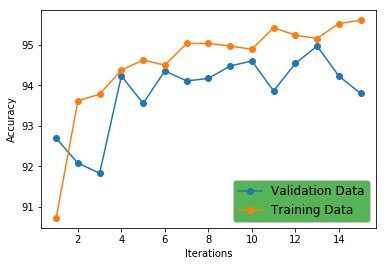

In [39]:
# Plot the recorded accuracies on training and validation data vs the iteration number
# t = np.linspace(1, 15, linewidth=2)
fig, ax = plt.subplots()
y=range(1,epoch+1)
ax.plot(y,valid_accuracy, 'o', linestyle='solid', label='Validation Data')
plt.xlabel('Iterations')
ax.plot(y,train_accuracy, 'o', linestyle='solid', label='Training Data')
plt.ylabel('Accuracy')
legend = ax.legend(loc='lower right',  fontsize='large')
# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C2')
plt.show()

In [13]:
# Load test data
df_test = load_data('pa2_test_no_label.csv')

In [14]:
# Pre-process the test data to add a bias term.
X_test = np.column_stack([np.ones((df_test.shape[0],1)).astype(float),df_test])
Efficient_W = np.zeros((X_test.shape[1],1))
Efficient_W = trained_W[:,epoch-2]

In [15]:
predict_output = predict_online_perceptron(X_test, Efficient_W)

[ -9402540.24842302 -10522762.27971849  -6920673.87327503 ...
  -4566588.39516429  12605694.05588008  -8429700.89283224]


In [16]:
np.savetxt("oplabel.csv", predict_output, fmt='%i', delimiter=",")